# Inaugural Project

## Introduction
This is a Python class HouseholdSpecializationModelClass that represents a household's choice between market work, home production, and leisure.

Here's a brief overview of what the different classes do:

- In the __init__() method, it sets up the model parameters and the solution namespace.
- The calc_utility() method calculates the utility of a given set of choices of market work, home production, and leisure.
- The solve_discrete() method solves the model by discretizing the choice space and finding the maximum of the utility function subject to the household's time constraint.
- The solve_continuous() method solves the model using continuous optimization by minimizing the negative of the utility function subject to the same time constraint.

The model assumes that the household's utility is a function of the consumption of market goods and home production, subject to a disutility of work. The household has a preference parameter omega that determines the relative weight of consumption of market goods and home production in the utility function. The household also has a disutility of work parameter epsilon that determines the curvature of the disutility of work function.

The household can choose how much time to allocate to market work, home production, and leisure subject to a time constraint of 24 hours. The household's home production function can take on three different functional forms depending on the value of the parameter sigma. 


#### Imports and set magics:

In [5]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code

from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm 
import pickle
from mpl_toolkits.mplot3d import Axes3D

from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1
We illustrate how $H_F/H_M$ changes when varying $\alpha$ $\in$ {0.25, 0.50, 0.75} and $\sigma$ = {0.5, 1.0, 1.5} by firstly solving the model discretely. This is done by calling the model from the 'py' file and assigning values to alpha and sigma. 

In [6]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different values alpha and sigma can take
alpha_values = [0.25, 0.50, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# Create empty arrays to store the results for each combination of alpha and sigma
HF_values = np.zeros((len(alpha_values), len(sigma_values)))
HM_values = np.zeros((len(alpha_values), len(sigma_values)))
HF_HM_ratios = np.zeros((len(alpha_values), len(sigma_values)))


# Solve the model for each combination of parameters and store the results
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        model.par.alpha = alpha
        model.par.sigma = sigma
        result = model.solve_discrete()
        HF_values[i, j] = result.HF
        HM_values[i, j] = result.HM
        # To avoid devision by zero we have implemented this if else statement where in the case on zero nan is used instead
        if result.HM != 0:
            HF_HM_ratios[i, j] = result.HF / result.HM
        else:
            HF_HM_ratios[i, j] = np.nan

        
# Save the results arrays using pickle
with open('results.pkl', 'wb') as f:
    pickle.dump((alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results.pkl', 'rb') as f:
    alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios = pickle.load(f)

/Users/sivertdahle/KU - Forår 23/Programming/Exam prep/inauguralproject.py:69: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1 - par.alpha )*HM**((par.sigma - 1)/par.sigma) + par.alpha * HF**((par.sigma - 1)/par.sigma))**(par.sigma/(par.sigma-1))


After finding the optimal values we plot a three dimensional plot in order to caputure all the effects. 

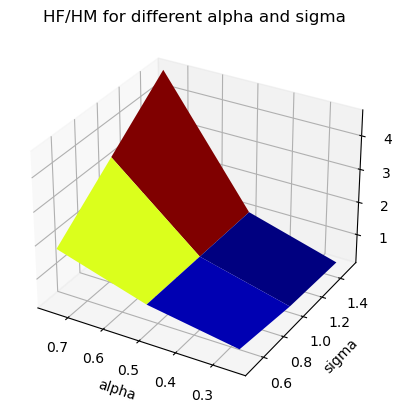

In [7]:
# making arrays for alpha and sigma
alpha = np.array([0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75]).reshape(3,3)
sigma = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5, 1, 1.5]).reshape(3,3)

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha,sigma,HF_HM_ratios,cmap=cm.jet)

# b. add labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')

# c. invert xaxis
ax.invert_xaxis()

# d. add title
ax.set_title('HF/HM for different alpha and sigma')

plt.show()

We observe that with increasing alpha and sigma the female home production relative to male home production increases.  Alpha is the female 
productivity in home production. When alpha increases, the female is more productive in home production, and therefore the amount of home production she makes is larger. As sigma represents the elasticity of substitution we see that when it increases, alongside an increase in alpha, it gets more costly to substitute female home production for male home production as the female is more productive.

## Question 2
We plot log $H_F/H_M$ against log $w_F/w_M$ for $w_F$ $\in$ $[0.8, 0.9, 1.0, 1.1, 1.2]$ using the results from question 1 but changing the female wage to differnt values to see how the agents changes their optimal solution when faced with different scenarios.


In [8]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different female wages
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]

# Solves the model for each combination of parameters and store the results
HF_values = []
HM_values = []
HF_HM_ratios = []
for wage in female_wage:
    model.par.wF = wage
    result = model.solve_discrete()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# Saves the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# Loads the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)

Then we plot the arrays against each other. 

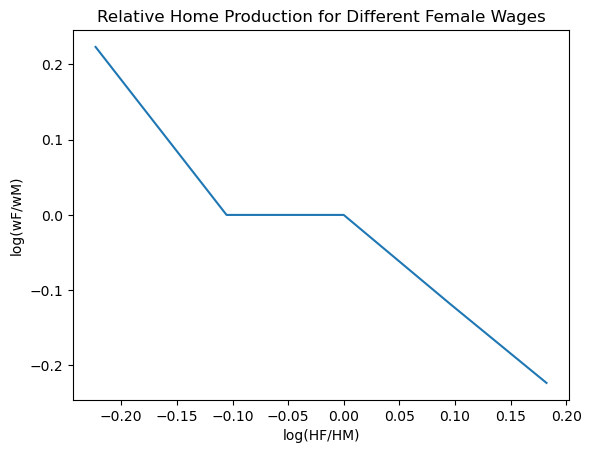

In [9]:
# Define the two arrays
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the arrays
ax.plot(Ln_Wage, Ln_HFHM)

# Add axis labels and a title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Relative Home Production for Different Female Wages')

# Display the plot
plt.show()

When female wages increase compared to the male wage, female home produciton decreases. To elaborate, wage equality also lead to equality in home prodution, whereas wage inequality leads to more disparaties in home produciton. 

## Question 3
Updated assumption: The choice of working hours is continous i.e. $L_M$, $L_F$, $H_M$, $H_F$ $\in$ [0,24]. 

We solve the model again but now continously.


In [10]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different values alpha and sigma can take
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]


# Solve the model for each combination of parameters and store the results
HF_values = []
HM_values = []
HF_HM_ratios = []
for wage in female_wage:
    model.par.wF = wage
    result = model.solve_continuous()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# Save the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)

/Users/sivertdahle/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


We plot log $H_F/H_M$ against log $w_F/w_M$ for $w_F$ $\in$ $[0.8, 0.9, 1.0, 1.1, 1.2]$.


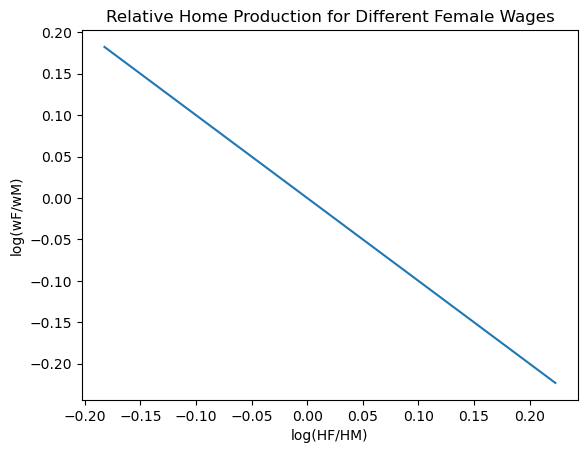

In [11]:
# Define the two arrays
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot arr1 against arr2
ax.plot(Ln_HFHM, Ln_Wage)

# Add axis labels and a title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Relative Home Production for Different Female Wages')

# Display the plot
plt.show()

Compared to the plot in question 2 we see that the line is now straight as the optimal solutions are continous. The same effect is captured here as in the discrete solution as a higher female wage leads her to having less home production relative to the male. 


## Question 4
We firstly use the optimal solution obtained in question 3, the HF and HM values, in order to replicate the regression conducted by Siminiski and Yetsenga. Then we find the optimal values for $\alpha$ and $\sigma$ in order to minimize the squared errors between $\beta_0$ and $\hat{\beta}_0$ and $\beta_1$ and $\hat{\beta}_1$. In order words so that $(\beta_0-\hat{\beta}_0)^2 + (\beta_1-\hat{\beta}_1)^2$ is minimized. 


In [12]:
model.solve_wF_vec(discrete=False)
reg = model.run3_regression()
model.sol.beta0
model.sol.beta1

print(model.sol.beta0)
print(model.sol.beta1)

-2.4426029762541797e-06
-0.9999870864642453


We see that with $\alpha = 0.5$ and $\sigma = 1$ our $\beta_0 = $ and $\beta_1 = -0.1006830505406786$ which is very close to the estimates Siminiski and Yetsenga. In order to minimize our error when then let $\alpha$ and $\sigma$ vary. 

In [13]:
model.estimate()

/Users/sivertdahle/KU - Forår 23/Programming/Exam prep/inauguralproject.py:69: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1 - par.alpha )*HM**((par.sigma - 1)/par.sigma) + par.alpha * HF**((par.sigma - 1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/sivertdahle/KU - Forår 23/Programming/Exam prep/inauguralproject.py:69: RuntimeWarning: overflow encountered in double_scalars
  H = ((1 - par.alpha )*HM**((par.sigma - 1)/par.sigma) + par.alpha * HF**((par.sigma - 1)/par.sigma))**(par.sigma/(par.sigma-1))


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.494499943060305e-10
             x: [ 9.820e-01  1.000e-01]
           nit: 47
          nfev: 89
 final_simplex: (array([[ 9.820e-01,  1.000e-01],
                       [ 9.820e-01,  1.001e-01],
                       [ 9.820e-01,  1.000e-01]]), array([ 4.494e-10,  2.412e-09,  2.843e-09]))

When we minimize the squared error we find that $\alpha = 0.98200402$ and $\sigma = 0.10001879$ will produce $\hat{\beta_0}$ and $\hat{\beta_1}$ values closest to the  $\beta_0 $ and $\beta_1$ obtained by Siminki and Yetsenga. 

Then we plot how the different values of $\alpha$ and $\sigma$ produce different sizes of the squared error.

Here we see that the squared error is minimized when we find that $\alpha = 0.98200402$ and $\sigma = 0.10001879$ as denoted by the point. The economic interpretation of this is that the woman is more productive in home production as the relative productivity is $\frac{\alpha}{1-\alpha} = \frac{0.98200402}{1-0.98200402} = 54,55$. Since $\sigma$ is = 0.1 it is hard to substitute between male and female home production. So the economic model seems to be outdated and is better at explaining society around the 1950s. 

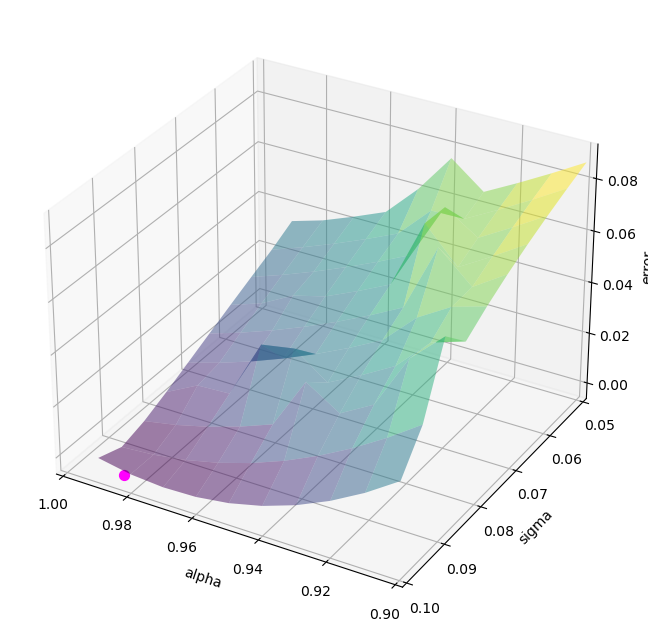

In [14]:
# Define values for alpha, sigma, and error
N = 10
alpha_vec = np.linspace(0.9, 0.99, N)
sigma_vec = np.linspace(0.05, 0.1, N) 

#error_values = np.zeros((N, N))  # Array to store error values
error_values_vec = []

# Setting initial values and alpha, sigma, betas
alpha = 0.9
sigma = 0.1
beta0_init = 0.4
beta1_init = -0.1

# Compute error values for all combinations of alpha and sigma
for i, alpha in enumerate(alpha_vec):
    model.par.alpha = alpha
    for j, sigma in enumerate(sigma_vec):
        model.par.sigma = sigma
        model.par.wF = 1
        model.solve_wF_vec()
        model.run3_regression()
        #error_values[i, j] = ((model.par.beta0_target - model.sol.beta0)**2) + ((model.par.beta1_target - model.sol.beta1)**2)
        error_values = ((beta0_init - model.sol.beta0)**2) + ((beta1_init - model.sol.beta1)**2)
        #error_values = ((model.par.beta0_target - model.sol.beta0)**2) + ((model.par.beta1_target - model.sol.beta1)**2)
        if error_values > 0:   # only include non-negative deviations
            error_values_vec.append(error_values)

error_values = np.array(error_values_vec).reshape(len(alpha_vec), len(sigma_vec))


# Plot the 3D surface with standard deviation as the Y-axis
#fig = plt.figure()
fig = plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

ax = fig.add_subplot(111, projection='3d')
alpha_mesh, sigma_mesh = np.meshgrid(alpha_vec, sigma_vec)

ax.plot_surface(alpha_mesh, sigma_mesh, error_values, cmap='viridis',  alpha = 0.5)
ax.set_xlim(1, 0.9)
ax.set_ylim(0.1, 0.05)

# Add a red marker for the specified point
ax.scatter(0.98200402, 0.10001879, 4.494499943063444e-10, color='magenta', s=50)

ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('error')
plt.show()


## Question 5
We try to make an extension of the model by optimizing when $\alpha$ is held constant at 0.5. 

In [15]:
model.set_work_disutility_gap(-0.25)
results = model.solve_discrete(do_print=True)
results = model.solve_continuous(do_print=True)

model.solve_wF_vec(discrete=False)
reg = model.run3_regression()
print(model.sol.beta0)
print(model.sol.beta1)

/Users/sivertdahle/KU - Forår 23/Programming/Exam prep/inauguralproject.py:69: RuntimeWarning: divide by zero encountered in power
  H = ((1 - par.alpha )*HM**((par.sigma - 1)/par.sigma) + par.alpha * HF**((par.sigma - 1)/par.sigma))**(par.sigma/(par.sigma-1))


LM = 3.5000
HM = 3.5000
LF = 5.5000
HF = 5.5000
LM = 3.3758
HM = 3.5063
LF = 5.5600
HF = 5.4513
0.45951338312089335
-0.0999980013557635


LM = 0.0000
HM = 4.5000
LF = 16.5000
HF = 7.5000
LM = 0.0000
HM = 5.5365
LF = 24.0000
HF = 24.0000
LM = 0.0000
HM = 4.5000
LF = 12.0000
HF = 7.0000
LM = 0.0000
HM = 4.5022
LF = 11.9451
HF = 7.1673
LM = 1.5000
HM = 4.0000
LF = 8.5000
HF = 6.0000
LM = 1.3965
HM = 3.9705
LF = 8.3180
HF = 6.1730
LM = 3.0000
HM = 3.5000
LF = 6.0000
HF = 5.5000
LM = 2.9292
HM = 3.5999
LF = 6.1556
HF = 5.5967
LM = 4.0000
HM = 3.5000
LF = 4.5000
HF = 5.5000
LM = 4.0160
HM = 3.3819
LF = 4.7293
HF = 5.2578
LM = 4.5000
HM = 3.5000
LF = 3.5000
HF = 5.5000
LM = 4.8422
HM = 3.2363
LF = 3.6933
HF = 5.0315
LM = 5.5000
HM = 3.0000
LF = 3.0000
HF = 4.5000
LM = 5.4970
HM = 3.1315
LF = 2.8971
HF = 4.8685
LM = 6.0000
HM = 3.0000
LF = 2.5000
HF = 4.5000
LM = 6.0314
HM = 3.0521
LF = 2.2622
HF = 4.7450
LM = 6.5000
HM = 3.0000
LF = 2.0000
HF = 4.5000
LM = 6.4770
HM = 2.9896
LF = 1.7419
HF = 4.6480
LM = 6.5000
HM = 3.0000
LF = 1.5000
HF = 4.5000
LM = 6.8547
HM = 2.9393
LF = 1.3067
HF = 4.5697


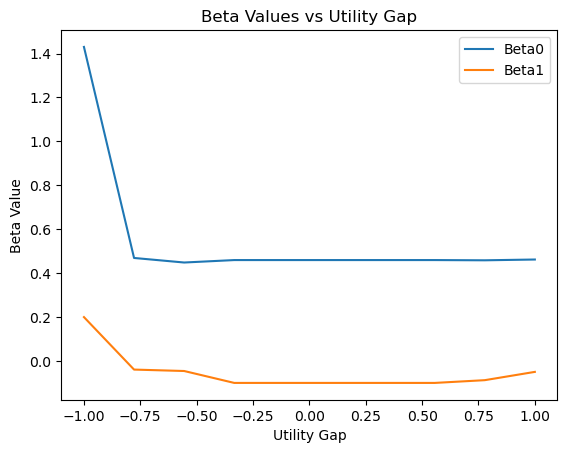

In [16]:
# Generate utility gap values between -1 and 1
utility_gap_values = np.linspace(-1.0, 1.0, 10)

# Lists to store beta values
beta0_values = []
beta1_values = []

# Loop over different values of the utility gap
for gap_value in utility_gap_values:
    # Set the value of the utility gap
    model.set_work_disutility_gap(gap_value)
    
    # Solve the model using the discrete choice method
    results = model.solve_discrete(do_print=True)
    
    # Solve the model using the continuous choice method
    results = model.solve_continuous(do_print=True)

    # Solve the model for vector of female wages and fixed male wage using continuous choice
    model.solve_wF_vec(discrete=False)
    reg = model.run3_regression()

    # Append the estimated beta0 and beta1 to the lists
    beta0_values.append(model.sol.beta0)
    beta1_values.append(model.sol.beta1)

# Generate the line graph
plt.plot(utility_gap_values, beta0_values, label='Beta0')
plt.plot(utility_gap_values, beta1_values, label='Beta1')
plt.xlabel('Utility Gap')
plt.ylabel('Beta Value')
plt.title('Beta Values vs Utility Gap')
plt.legend()
plt.show()



In [17]:
model.estimate2()

alpha = 0.5, sigma = 0.5
beta0 = 0.015129112469792688, beta1 = -0.5863104415765057
alpha = 0.5, sigma = 0.525
beta0 = 0.01538913705709502, beta1 = -0.6115937174592152
alpha = 0.5, sigma = 0.475
beta0 = 0.014817677273893989, beta1 = -0.5606378931767566
alpha = 0.5, sigma = 0.44999999999999996
beta0 = 0.014482879843046704, beta1 = -0.5347305534933825
alpha = 0.5, sigma = 0.3999999999999999
beta0 = 2.5588465039117e-06, beta1 = -0.39997148244534203
alpha = 0.5, sigma = 0.34999999999999987
beta0 = 1.0707577323900624e-06, beta1 = -0.3500120163619821
alpha = 0.5, sigma = 0.24999999999999978
beta0 = 0.002245615652033445, beta1 = -0.27603688835341733
alpha = 0.5, sigma = 0.1499999999999997
beta0 = 1.843262514778214e-06, beta1 = -0.150023569165207
alpha = 0.5, sigma = 0.0001
beta0 = -7.100188457338662e-05, beta1 = -1.2606187217920062e-19
alpha = 0.5, sigma = 0.0499999999999996
beta0 = -8.583927681182508e-07, beta1 = -0.050014351481025746
alpha = 0.5, sigma = 0.0001
beta0 = -7.100188457338662e-05

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.15906771214902507
             x: [ 9.023e-02]
           nit: 15
          nfev: 32
 final_simplex: (array([[ 9.023e-02],
                       [ 9.033e-02]]), array([ 1.591e-01,  1.591e-01]))

However when alpha is held constant the error is still minimized when $\sigma \approx 0.1$ but as $\alpha$ cannot vary the sqaured error becomes larger. Therefore this extension does not seem to help match the data when $\alpha = 0.5$.